# 1.3 Additional exercises

In this notebook, we explore different coding examples and exercises to become more familiar with PyTorch. Feel free to choose those that you find most interesting.

- [Gradients](#Gradients)
- [More on tensor operations](#More-on-tensor-operations)
- [Linear regression](#Linear-regression)
- [Save and load models](#Save-and-load-models)

## Gradients

Autograd, short for automatic differentiation, is a fundamental concept in PyTorch that enables automatic computation of gradients for tensor operations. It is a key component of PyTorch's dynamic computational graph, allowing users to easily compute gradients with respect to input tensors.

**Exercise 1**: Explain the code below. What does each line of code do?

In [1]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([2.0], requires_grad=True)

# Perform a mathematical operation
y = x**2 + 3*x + 1

# Compute the gradient
y.backward()

# Access the gradient
gradient = x.grad

print("Original Tensor (x):", x.item())
print("Result of the Operation (y):", y.item())
print("Gradient with respect to x:", gradient.item())

Original Tensor (x): 2.0
Result of the Operation (y): 11.0
Gradient with respect to x: 7.0


**Exercise 2**: Compute the gradient for $y = x^2 + 3\cdot x + 1$ for a whole range of x (from -5 to 5) and plot your results.

In [2]:
import torch
import matplotlib.pyplot as plt

# Create a tensor with requires_grad=True
x_values = torch.linspace(-5, 5, 100, requires_grad=True)

# Compute y, compute gradients and plot both y and dy/dx as a function of x.

#[INSERT YOUR CODE HERE]

## More on tensor operations

**Exercise 3**: Have a look at more examples on PyTorch's tensors on their own [homepage](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html).

**Exercise 4**: The code below is missing comments. Explain the code.

In [3]:
import torch

tensor_2d = torch.tensor([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]])

print("Original 2D Tensor:")
print(tensor_2d)
print()

element_00 = tensor_2d[0, 0]
element_12 = tensor_2d[1, 2]

print("Individual Elements:")
print("Element at [0, 0]:", element_00.item())
print("Element at [1, 2]:", element_12.item())
print()

submatrix_row1 = tensor_2d[1, :]
submatrix_col2 = tensor_2d[:, 2]

print("Submatrices:")
print("Second Row:", submatrix_row1)
print("Third Column:", submatrix_col2)

Original 2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Individual Elements:
Element at [0, 0]: 1
Element at [1, 2]: 6

Submatrices:
Second Row: tensor([4, 5, 6])
Third Column: tensor([3, 6, 9])


**Exercise 5**: Concatenate two 1D tensors along a specified dimension. Print the original tensors and the result after concatenation.

**Exercise 6**: Create two tensors of the same shape and perform element-wise comparisons (e.g., greater than, equal to). Print the original tensors and the results of each comparison.

## Linear regression

PyTorch can facilitate many other analyses and be used to create models outside of machine learning. For instance, one can use PyTorch for linear regression. Actually, all you have to do is to change the model: Rather than defining a neural network, you define a linear model. Beyond this change, the logic of the rest of the code stays the same. We assume Gaussian noise and hence try to minimise the mean squared errors rather than the cross entropy.

**Exercise 7**: Discuss the code in the group. What do the different lines do an mean? Change the optimiser. Change the number of epochs. Print the loss for every epoch.

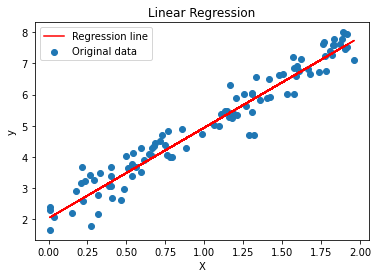

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
torch.manual_seed(42)
X = 2 * torch.rand(100, 1)  # Random input data
y = 3 * X + 2 + 0.5 * torch.randn(100, 1)  # Linear relation with noise

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)

    # Compute the loss
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the original data and the learned regression line
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()

**Exercise 8**: Create a new example where you attempt to fit a parabola to a synthetic data set.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
torch.manual_seed(42)
X = 2 * torch.rand(100, 1)  # Random input data
y = 2 * X**2 + 3 * X + 2 + 0.5 * torch.randn(100, 1)  # Quadratic relation with noise

#[INSERT YOUR CODE HERE]

## Save and load models

**Exercise 9**: Once you have created a model (be it a linear model or a neural network), you can save it to file. Later you can load it again. How do you do that in PyTorch?

## Logistic regression

As illustrated above with the linear and quadratic fit to data, you can train other models, using PyTorch

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)
X_positive = torch.randn(100, 2) + torch.tensor([2, 2])
X_negative = torch.randn(100, 2) + torch.tensor([-2, -2])
X = torch.cat([X_positive, X_negative], dim=0)
y = torch.cat([torch.ones(100), torch.zeros(100)])

# Shuffle the data
shuffle_indices = torch.randperm(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Define a simple logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Instantiate the model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

**Exercise 10**: In logistic regression, we address a binary classification task. Plot the data to get an overview of the synthetic data set. Then train the model.

**Exercise 11**: Modify the synthetic data generation to introduce class imbalance (e.g., 80% negative samples and 20% positive samples). Retrain the logistic regression model and observe its performance. How do you deal with imballanced data?

## Custom loss function

Rather than using an existing loss function, you can create your own.

In [7]:
import torch
import torch.nn as nn

# Custom Loss Function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, predictions, targets):
        # Custom loss computation
        loss = torch.mean((predictions - targets)**2)
        return loss

**Exercise 12**: The loss function above is just the MSE. You the custom loss function for linear regression

In [8]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, custom loss, and optimizer
model = LinearRegressionModel()
#[INSERT CODE HERE]
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate synthetic data
torch.manual_seed(42)
inputs = torch.randn(100, 1)
targets = 3 * inputs + 2 + 0.5 * torch.randn(100, 1)

# Training loop and plot results 
#[INSERT CODE HERE]